In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from final_project_code import FinalProject 
from newton_raphson import Newton_Raphson
from final_plot import plot_stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from matplotlib.patches import Patch
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

FP = FinalProject()
df = pd.read_csv("./AG_Corp_Prod_DataBase.csv")
df = FP.create_balanced_data(df)
FP = FinalProject()
train, validate, test = FP.split_data(df)
df_train, X_train, y_train = FP.prepare_data(train)
df_validate, X_validate, y_validate= FP.prepare_data(validate)
df_test, X_test, y_test = FP.prepare_data(test)

df incorporated have 2393 many rows
after balancing, df not incorporated have 2393 many rows


/tmp/ipykernel_11574/3776540392.py:7: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./AG_Corp_Prod_DataBase.csv")


In [7]:
df = df[['id', 'Form', 'FoundingYear',
       'Province', 'Region', 'Industry', 'OntheSide', 'Age', 'TaxedActivity',
       'YEAR', 'SubindustryCode', 'STCAP', 'Revenue',
       'TotalWorkers', 'TotalPower', 'GrandTotalWorkers', 'RevperWorker',
       'PowerperWorker', 'RevperGrandWorker', 'PowerperGrandWorker',
       'logRevperWorker', 'logPowerperWorker', 'logRevperGrandWorker',
       'logPowerperGrandWorker', 'logRev', 'logWorkers', 'logPower',
       'RegIndGroup', 'RegIndYearGroup', 'ProvIndGroup', 'ProvIndYearGroup',
       'IndYearGroup', 'IndustryFactor', 'ProvinceFactor', 'YearFactor',
       'AKTS', 'PAI', 'factory_id', 'FormNextYear', 'FormNextNextYear',
       'FactoryisCorpin1894', 'FormNextYearin1894', 'FactoryisCorpin1900',
       'FormNextYearin1900', 'FactoryisCorpin1908', 'NEWDEV', 'SHARES',
       'STPRICE', 'BONDS', 'Silk', 'Flax', 'Animal', 'Wool', 'Cotton',
       'MixedMaterials', 'Wood', 'Paper', 'MetalsandMachines', 'Foods',
       'Chemical', 'Mineral']]

In [4]:
cols = ['PowerperWorker', 'RevperGrandWorker']
cols = ['logWorkers', 'logPower'] 
X_train = X_train.fillna(0)
print(X_train[cols].shape)
beta_old = np.ones((X_train[cols].shape[1],1))
print(beta_old.shape)
X_train = X_train[cols]
X_train = X_train.to_numpy()

y_train = y_train.to_numpy()
y_train = y_train.reshape(-1)
print(y_train.shape)

(2871, 2)
(2, 1)
(2871,)


In [5]:
mySVC = SVC(kernel="sigmoid", gamma="auto", shrinking=False)
mySVC.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid', shrinking=False)

SVC


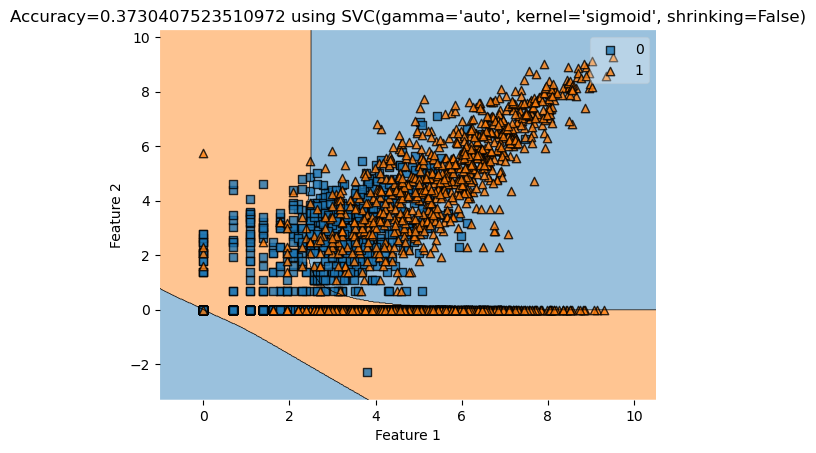

In [6]:
from newton_raphson import Newton_Raphson 
NR2 = Newton_Raphson()
y_train = y_train.reshape(-1)
NR2.simple_plot(model = mySVC, X = X_train, y = y_train)
print("SVC")